<a href="https://colab.research.google.com/github/sudharshanpaul/Machine-Learning/blob/main/EDA/BlackFriday.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Black Friday Dataset EDA and Feature Engineering
### Cleaning and preparing for Model training

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
# Importing the Dataset
df_train = pd.read_csv('/content/train.csv')

In [96]:
df_train.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


#### Problem Statement:
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [97]:
df_train.shape

(271046, 12)

In [98]:
# import the test data
df_test = pd.read_csv('/content/test.csv')

In [99]:
df_test.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [100]:
# Add the Datasets
df=pd.concat([df_train,df_test],ignore_index=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504645 entries, 0 to 504644
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     504645 non-null  int64  
 1   Product_ID                  504645 non-null  object 
 2   Gender                      504645 non-null  object 
 3   Age                         504645 non-null  object 
 4   Occupation                  504644 non-null  float64
 5   City_Category               504644 non-null  object 
 6   Stay_In_Current_City_Years  504644 non-null  object 
 7   Marital_Status              504644 non-null  float64
 8   Product_Category_1          504644 non-null  float64
 9   Product_Category_2          348351 non-null  float64
 10  Product_Category_3          154105 non-null  float64
 11  Purchase                    271045 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 46.2+ MB


In [102]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.046450e+05,504644.000000,504644.000000,504644.000000,348351.000000,154105.000000,271045.000000
mean,1.003019e+06,8.078441,0.409800,5.285570,9.847223,12.662814,9320.462170
std,1.722568e+03,6.521020,0.491797,3.741159,5.090600,4.127610,4972.378115
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001510e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5863.000000
50%,1.003066e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8060.000000
75%,1.004461e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12061.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [103]:
df.drop(['User_ID'],axis=1,inplace=True)

In [104]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [105]:
df.Gender.value_counts()

,count
Gender,
M,380073
F,124572


In [106]:
df.Gender.isnull().sum()

0

One way of converting the Gender categorical feature into numerical we can use get_dummies() but if we do that we want to append those column and we have to delete the column

In [107]:
pd.get_dummies(df['Gender'],dtype='int',drop_first=True)

,M
0,0
1,0
2,0
3,0
4,1
...,...
504640,0
504641,0
504642,0
504643,0


***We'll try to do in another way***

df['Gender'] = pd.get_dummies(df['Gender'],dtype='int',drop_first=True)

In [108]:
# Handling the categorical feature Gender
df['Gender'] = df['Gender'].map({'F':0,'M':1})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [109]:
## Handling the categorical feature Age
df.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25', '2'],
      dtype=object)

In [110]:
df.Age.value_counts()

,count
Age,
26-35,201545
36-45,100838
18-25,91873
46-50,41857
51-55,35306
55+,19681
0-17,13544
2,1


In [111]:
# pd.get_dummies(df['Age'],dtype='int',drop_first=True)

**Here it it not good practise because in E-Commerse website all the categories of Age won't shop equally may be 0-17 shops less and 25-38 shops very more. So give ranks to those varibales. It is also Known as** *****Target Odinal Encoding***** or ***Target Guiding***.

In [112]:
# Atleast value we have to put 0 is not good
# Label encoding can also be done
df['Age'] = df['Age'].map({'0-17':1,'18-25':2,'26-35':3,'36-45':4,'46-50':5,'51-55':6,'55+':7})

In [113]:

# # Import label encoder
# from sklearn import preprocessing

# # label_encoder object knows
# # how to understand word labels.
# label_encoder = preprocessing.LabelEncoder()

# # Encode labels in column 'species'.
# df['species']= label_encoder.fit_transform(df['species'])

# df['species'].unique()

In [114]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1.0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,P00248942,0,1.0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,P00087842,0,1.0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,P00085442,0,1.0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,P00285442,1,7.0,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [115]:
## Fixing categorical variable city_category
df['City_Category'].value_counts()

,count
City_Category,
B,213018
C,156137
A,135489


In [116]:
df_city = pd.get_dummies(df['City_Category'],dtype=int,drop_first=True)

In [117]:
df_city

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
504640,1,0
504641,1,0
504642,1,0
504643,0,1


In [118]:
df = pd.concat([df,df_city],axis=1)

In [119]:
df

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10.0,A,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0,1.0,10.0,A,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10.0,A,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0,1.0,10.0,A,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1,7.0,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
504640,P00118942,0,3.0,15.0,B,4+,1.0,8.0,NaN,NaN,NaN,1,0
504641,P00254642,0,3.0,15.0,B,4+,1.0,5.0,8.0,NaN,NaN,1,0
504642,P00031842,0,3.0,15.0,B,4+,1.0,1.0,5.0,12.0,NaN,1,0
504643,P00124742,0,5.0,1.0,C,4+,0.0,10.0,16.0,NaN,NaN,0,1


In [120]:
## Drop City cateogery
df.drop(['City_Category'],axis=1,inplace=True)

In [121]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10.0,2,0.0,3.0,NaN,NaN,8370.0,0,0
1,P00248942,0,1.0,10.0,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10.0,2,0.0,12.0,NaN,NaN,1422.0,0,0
3,P00085442,0,1.0,10.0,2,0.0,12.0,14.0,NaN,1057.0,0,0
4,P00285442,1,7.0,16.0,4+,0.0,8.0,NaN,NaN,7969.0,0,1


In [122]:
## Missing Values
df.isnull().sum()

,0
Product_ID,0
Gender,0
Age,1
Occupation,1
Stay_In_Current_City_Years,1
Marital_Status,1
Product_Category_1,1
Product_Category_2,156294
Product_Category_3,350540
Purchase,233600


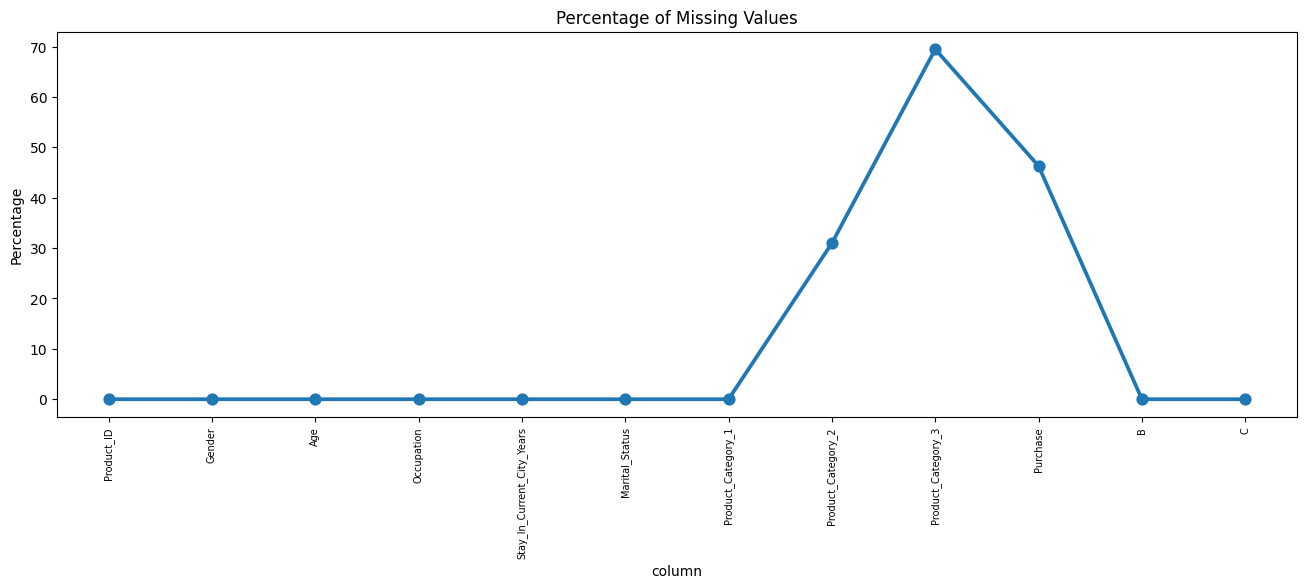

In [123]:
missing = pd.DataFrame((df.isnull().sum()) * 100 / df.shape[0]).reset_index()
missing.columns = ['column', 'percentage_missing']  # Rename columns for clarity

plt.figure(figsize=(16, 5))
ax = sns.pointplot(x='column', y='percentage_missing', data=missing)  # Specify x and y properly
plt.xticks(rotation=90, fontsize=7)
plt.title("Percentage of Missing Values")
plt.ylabel("Percentage")
plt.show()

Purchase will have **null** values because we included test Data

In [124]:
## Focus on Replacing Missing Values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [125]:
df['Product_Category_3'].value_counts()

,count
Product_Category_3,
16.0,30009
15.0,25844
14.0,17039
17.0,15495
5.0,15457
8.0,11571
9.0,10797
12.0,8487
13.0,5049


Here these two are categorical features and discrete sooo we'll replace it with the mode

In [126]:
df['Product_Category_2'].mode()

,Product_Category_2
0,8.0


In [127]:
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [128]:
df['Product_Category_2'].isnull().sum()

0

In [129]:
df['Product_Category_3'].unique()

array([nan, 14., 17.,  5.,  4., 16., 15.,  8.,  9., 13.,  6., 12.,  3.,
       18., 11., 10.])

In [130]:
df['Product_Category_3'].mode()

,Product_Category_3
0,16.0


In [131]:
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [132]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10.0,2,0.0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,0,1.0,10.0,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10.0,2,0.0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,0,1.0,10.0,2,0.0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,1,7.0,16.0,4+,0.0,8.0,8.0,16.0,7969.0,0,1


In [133]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0', nan], dtype=object)

In [134]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','')

In [135]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10.0,2,0.0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,0,1.0,10.0,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10.0,2,0.0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,0,1.0,10.0,2,0.0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,1,7.0,16.0,4,0.0,8.0,8.0,16.0,7969.0,0,1


In [136]:
type(df['Stay_In_Current_City_Years'][0])

str

In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504645 entries, 0 to 504644
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  504645 non-null  object 
 1   Gender                      504645 non-null  int64  
 2   Age                         504644 non-null  float64
 3   Occupation                  504644 non-null  float64
 4   Stay_In_Current_City_Years  504644 non-null  object 
 5   Marital_Status              504644 non-null  float64
 6   Product_Category_1          504644 non-null  float64
 7   Product_Category_2          504645 non-null  float64
 8   Product_Category_3          504645 non-null  float64
 9   Purchase                    271045 non-null  float64
 10  B                           504645 non-null  int64  
 11  C                           504645 non-null  int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 46.2+ MB


In [138]:
df['Stay_In_Current_City_Years'].isnull().sum()

1

In [139]:
## Convert object into Interger
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].fillna(3).astype(int)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,0,1.0,10.0,2,0.0,3.0,8.0,16.0,8370.0,0,0
1,P00248942,0,1.0,10.0,2,0.0,1.0,6.0,14.0,15200.0,0,0
2,P00087842,0,1.0,10.0,2,0.0,12.0,8.0,16.0,1422.0,0,0
3,P00085442,0,1.0,10.0,2,0.0,12.0,14.0,16.0,1057.0,0,0
4,P00285442,1,7.0,16.0,4,0.0,8.0,8.0,16.0,7969.0,0,1


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504645 entries, 0 to 504644
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  504645 non-null  object 
 1   Gender                      504645 non-null  int64  
 2   Age                         504644 non-null  float64
 3   Occupation                  504644 non-null  float64
 4   Stay_In_Current_City_Years  504645 non-null  int64  
 5   Marital_Status              504644 non-null  float64
 6   Product_Category_1          504644 non-null  float64
 7   Product_Category_2          504645 non-null  float64
 8   Product_Category_3          504645 non-null  float64
 9   Purchase                    271045 non-null  float64
 10  B                           504645 non-null  int64  
 11  C                           504645 non-null  int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 46.2+ MB


In [141]:
### Visualization
#sns.pairplot(df)

<Axes: xlabel='Age', ylabel='Purchase'>

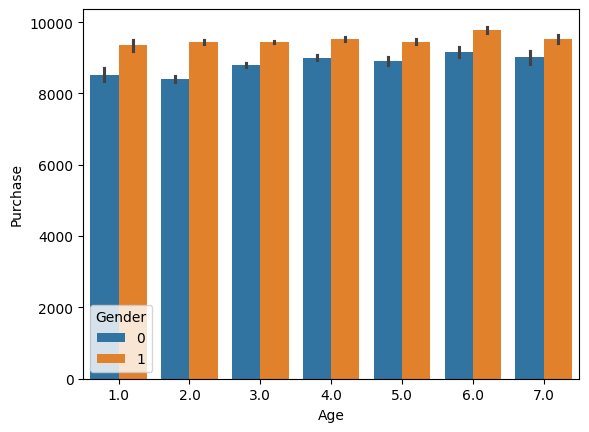

In [142]:
### Visualization
sns.barplot(x='Age',y='Purchase',data=df,hue='Gender')

**From every age cateogery Male purchase is more than the female** \\
**Purchase of each range of goods in all ranges are almost equal**

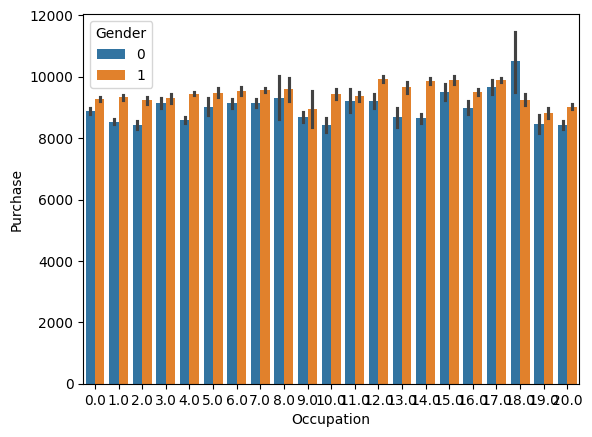

In [143]:
_= sns.barplot(x='Occupation',y='Purchase',data=df,hue='Gender')

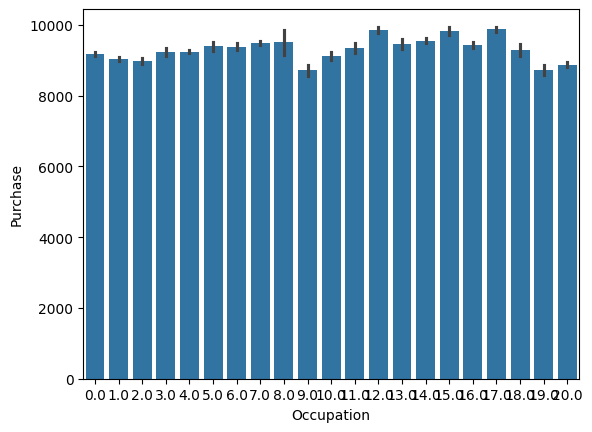

In [144]:
_= sns.barplot(x='Occupation',y='Purchase',data=df)

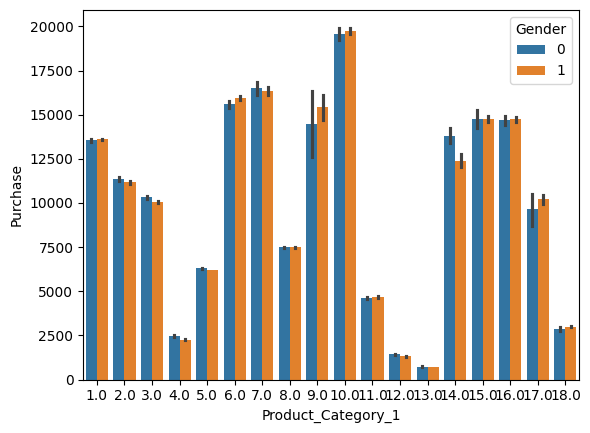

In [145]:
_= sns.barplot(x='Product_Category_1',y='Purchase',data=df,hue='Gender')

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

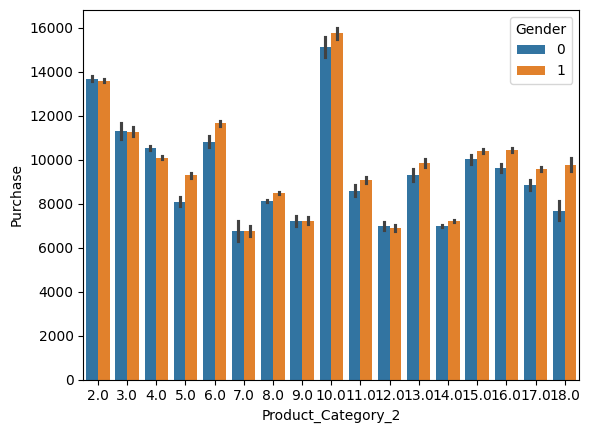

In [146]:
sns.barplot(x='Product_Category_2',y='Purchase',data=df,hue='Gender')

Gender doesn't show difference with Product categories with Purchase
Both the Product categories has high purchages in 10

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

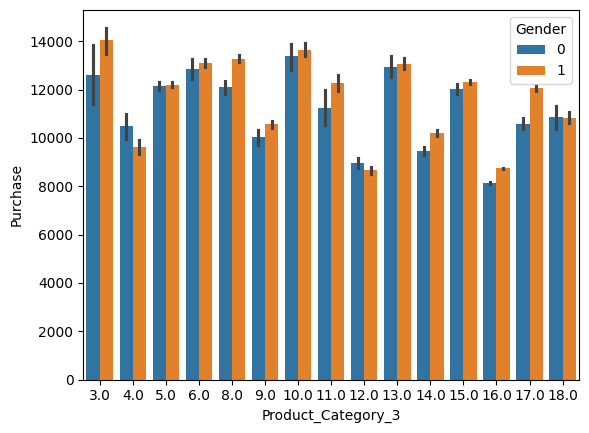

In [147]:
sns.barplot(x='Product_Category_3',y='Purchase',data=df,hue='Gender')

**Product Categery 1 got the highest purchase that is 20k**

WE can also drop Product ID

In [148]:
## Feature Scaling
df_test = df[df['Purchase'].isnull()]

In [149]:
df_train = df[~df['Purchase'].isnull()]

In [150]:
X = df_train.drop(['Purchase'],axis=1)

In [151]:
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,0,1.0,10.0,2,0.0,3.0,8.0,16.0,0,0
1,P00248942,0,1.0,10.0,2,0.0,1.0,6.0,14.0,0,0
2,P00087842,0,1.0,10.0,2,0.0,12.0,8.0,16.0,0,0
3,P00085442,0,1.0,10.0,2,0.0,12.0,14.0,16.0,0,0
4,P00285442,1,7.0,16.0,4,0.0,8.0,8.0,16.0,0,1


In [152]:
y=df_train['Purchase']

In [153]:
y

,Purchase
0,8370.0
1,15200.0
2,1422.0
3,1057.0
4,7969.0
...,...
271040,15307.0
271041,16223.0
271042,7887.0
271043,15214.0


In [154]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [157]:
## Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [164]:
X_train.drop('Product_ID',axis=1,inplace=True)
X_test.drop('Product_ID',axis=1,inplace=True)

In [165]:
help(sc.fit_transform)

Help on method fit_transform in module sklearn.base:

fit_transform(X, y=None, **fit_params) method of sklearn.preprocessing._data.StandardScaler instance
    Fit to data, then transform it.
    
    Fits transformer to `X` and `y` with optional parameters `fit_params`
    and returns a transformed version of `X`.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Input samples.
    
    y :  array-like of shape (n_samples,) or (n_samples, n_outputs),                 default=None
        Target values (None for unsupervised transformations).
    
    **fit_params : dict
        Additional fit parameters.
    
    Returns
    -------
    X_new : ndarray array of shape (n_samples, n_features_new)
        Transformed array.



In [166]:
X_train = sc.fit_transform(X_train)

In [167]:
X_test = sc.transform(X_test)

In [168]:
## Traun Your Model....